In [1]:
from exponential import *

In [2]:
params=[]
E=[]
N=[]

In [3]:
from scipy.optimize import minimize

def f(x):
    if x[0]<=0 or x[1]<=0 or x[2]<0:
        return 10000

    return H_func(0,0,[x[0]],[x[1]],[x[2]])

res=minimize(f,x0=[0.03,0.03,0],method='Nelder-Mead')
print(res)
params.append(res.x)

N.append(1)
E.append(res.fun)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -77.47800770399431
             x: [ 3.186e-02  3.191e-02  3.103e-08]
           nit: 51
          nfev: 96
 final_simplex: (array([[ 3.186e-02,  3.191e-02,  3.103e-08],
                       [ 3.188e-02,  3.187e-02,  7.820e-08],
                       [ 3.187e-02,  3.189e-02,  2.342e-07],
                       [ 3.185e-02,  3.191e-02,  2.026e-07]]), array([-7.748e+01, -7.748e+01, -7.748e+01, -7.748e+01]))


In [4]:
print(params)

[array([3.18607670e-02, 3.19130809e-02, 3.10252226e-08])]


In [5]:
for i in range(100):
    print(i)
    def f(x):
        if x[0]<=0 or x[1]<=0 or x[2]<=0:
            return 10000
        
        theparams=np.expand_dims(np.array(params+[x]).transpose(),-1)

        subspace=Subspace(len(params)+1)

        subspace.set_N_func(N_func)
        subspace.set_H_func(H_func)

        subspace.set_params(1,theparams)

        subspace.make_N_mats_vectorized()
        subspace.make_H_mats_vectorized()
        subspace.find_N_eigens()
        subspace.make_Y_mats()
        subspace.make_invs_sqrt_beta_mats()
        subspace.make_P_mats()
        subspace.find_P_eigens()
        subspace.find_energy_levels()
        return subspace.energy_levels[0,0]

    res=minimize(f,x0=[0.02,0.02,0.004],method='Nelder-Mead')

    params.append(res.x)

    N.append(i+1)
    E.append(res.fun)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


c:\Users\myles\Documents\GitHub\3-particle-quantum-systems\header.py:76: RuntimeWarning: invalid value encountered in sqrt
  invs_sqrt_beta[:,i,i]=1/np.sqrt(self.N_eigenvalues[:,i])


LinAlgError: Array must not contain infs or NaNs

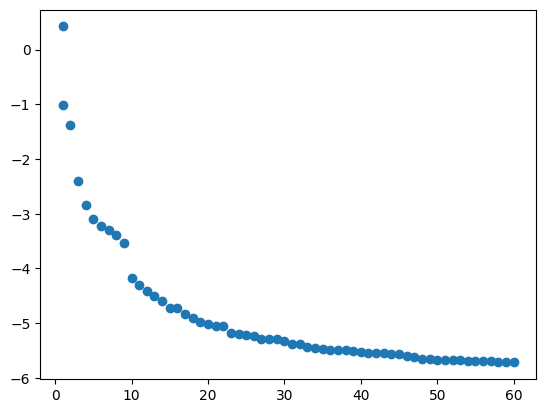

In [6]:
import matplotlib.pyplot as plt

plt.scatter(N,np.log(np.array(E)+79.005168))

In [7]:
print(E)

[np.float64(-77.47800770399431), np.float64(-78.64464969705529), np.float64(-78.75169253726284), np.float64(-78.91499442169135), np.float64(-78.94686127315357), np.float64(-78.95992057211234), np.float64(-78.96536822268288), np.float64(-78.96824863108266), np.float64(-78.97120820741127), np.float64(-78.9760088189376), np.float64(-78.98992830419887), np.float64(-78.99157952670978), np.float64(-78.99305551190119), np.float64(-78.9941064265197), np.float64(-78.99514910417952), np.float64(-78.99624289755292), np.float64(-78.99637246524242), np.float64(-78.99719798731446), np.float64(-78.99776763146359), np.float64(-78.99829230949278), np.float64(-78.99849906858596), np.float64(-78.99872822232958), np.float64(-78.99883532811191), np.float64(-78.9995829359161), np.float64(-78.99963126353518), np.float64(-78.999751676737), np.float64(-78.99985774606205), np.float64(-79.00010176679088), np.float64(-79.00015293415231), np.float64(-79.00017836069863), np.float64(-79.00035551703522), np.float64(-

In [13]:
x0=np.array(params).flatten()

In [14]:
dim=61

In [18]:
def f(x):
    theseparams=np.expand_dims(x.reshape(3,-1,order='F'),-1)

    for i in range(dim):
        a,b,c=theseparams[:,i].flatten()
        if a<0 or b<0 or c<0 or a*b==0 or a*c==0 or b*c==0:
            return 1000
        
    subspace=Subspace(dim)

    subspace.set_N_func(N_func)
    subspace.set_H_func(H_func)

    subspace.set_params(1,theseparams)

    subspace.make_N_mats_vectorized()
    subspace.make_H_mats_vectorized()
    subspace.find_N_eigens()
    if np.any(subspace.N_eigenvalues<0):
        return 1000
    subspace.make_Y_mats()
    subspace.make_invs_sqrt_beta_mats()
    subspace.make_P_mats()
    subspace.find_P_eigens()
    subspace.find_energy_levels()
    return subspace.energy_levels[0,0]
    
    

In [19]:
print(f(x0))

-79.00189111528225


In [20]:
x=x0
for i in range(100):    
    res=minimize(f,x0=x,method='Nelder-Mead')
    print(res.fun)
    x=res.x

-79.00207308068234
-79.00212971529533
-79.00238561072652


C:\Users\myles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\optimize\_optimize.py:876: ComplexWarning: Casting complex values to real discards the imaginary part
  fsim[-1] = fxr


-79.00249621476293
-79.00251797822453
-79.0025273668573
-79.00252770119744


KeyboardInterrupt: 

In [21]:
#record -79.00252770119744

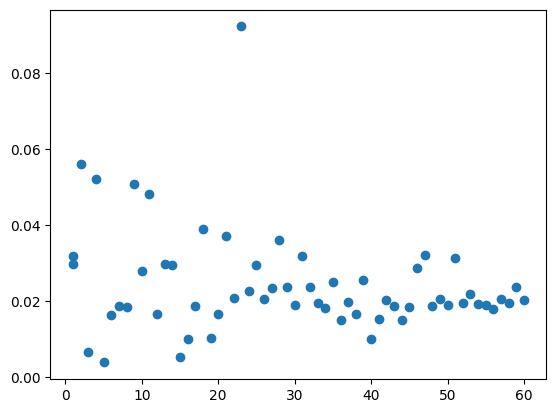

In [24]:
theparams=x.reshape(3,-1,order='F')
plt.scatter(N,theparams[0])